In [7]:
%matplotlib notebook

# Learning a simple non-linear, noisy function 

<IPython.core.display.Javascript object>


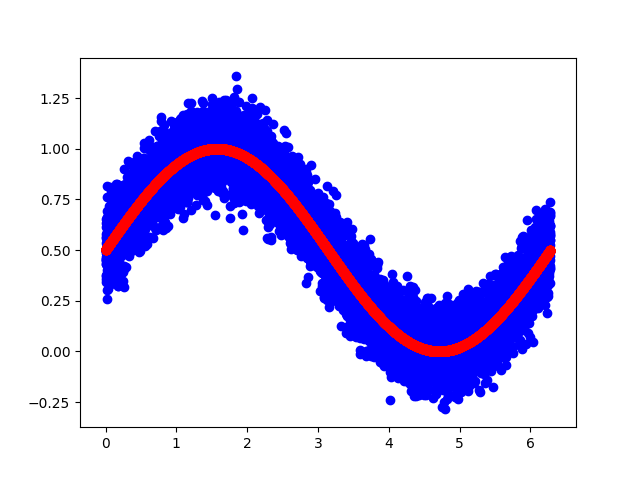

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

N = 1000 # observations
P = 10000 # samples
epochs = 100

domain = np.linspace(0, 2.*np.pi, P)
Y = np.sin(domain)
amin = np.amin(Y)
amax = np.amax(Y)
Y = (Y - amin) / (amax - amin) 
X = np.array([Y + np.random.normal(size=P, scale=0.1) for _ in range(N)])

plt.scatter(domain, X[0,:], color='b')
plt.scatter(domain, Y, color='r')
plt.show()

## Deep, Dense auto-encoder

Start with with a basic deep, dense, auto-encoding network.

In [9]:
graph = tf.get_default_graph()
with graph.as_default():
        
    dataset = tf.data.Dataset.from_tensor_slices(X)
    dataset.repeat(epochs)
    
    iterator = dataset.make_initializable_iterator()
    x = iterator.get_next()
    
    # encoder
    x = tf.reshape(x, [1, P])
    enc_layer1 = tf.layers.dense(inputs=x, units=512, activation=tf.nn.sigmoid)
    enc_layer2 = tf.layers.dense(inputs=enc_layer1, units=256, activation=tf.nn.sigmoid)
    latent_space = tf.layers.dense(inputs=enc_layer2, units=128, activation=tf.nn.sigmoid)
    
    # decoder
    dec_layer1 = tf.layers.dense(inputs=latent_space, units=128, activation=tf.nn.sigmoid)
    dec_layer2 = tf.layers.dense(inputs=dec_layer1, units=256, activation=tf.nn.sigmoid)
    dec_layer3 = tf.layers.dense(inputs=dec_layer2, units=512, activation=tf.nn.sigmoid)
    x_hat = tf.layers.dense(inputs=dec_layer3, units=P)
    
    loss = tf.losses.mean_squared_error(x, x_hat)
    
    optimizer = tf.train.AdamOptimizer()
    train_op = optimizer.minimize(loss=loss)
    

In [10]:
loss_log = list()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for _ in range(epochs):
        sess.run(iterator.initializer)
        sess.run(train_op)
        loss_log.append(sess.run(loss))

    x_hat = sess.run(x_hat)

## Metrics

<IPython.core.display.Javascript object>


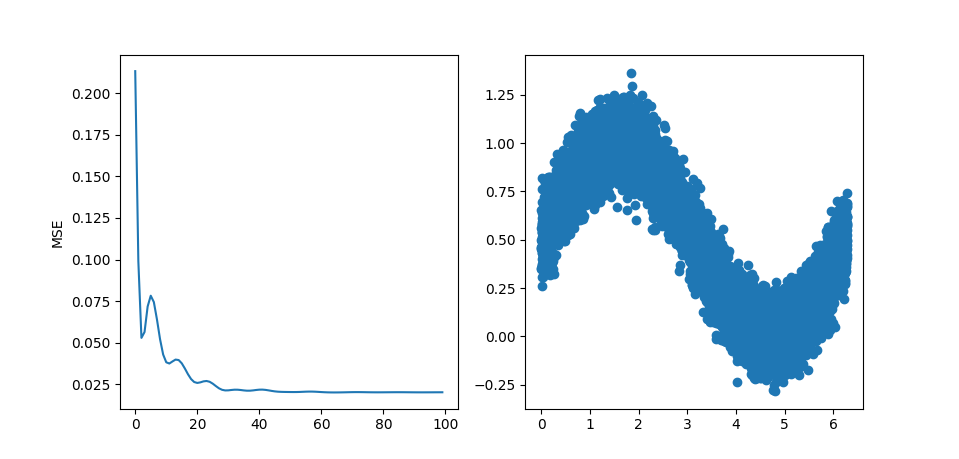

In [11]:
plt.subplot(1, 2, 1)
plt.plot(loss_log)
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.scatter(domain, x_hat[0, :])

plt.show()